In [228]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error    

In [229]:
df = pd.read_csv("selected.csv", index_col = False)
df.drop(["Unnamed: 0"], inplace = True, axis = 1)

In [230]:
df = df.replace(' NA', np.nan)
df = df.replace('NA', np.nan)

In [231]:
df.isna().sum(axis = 0).sort_values()[-15:]

217815_at        0
204888_s_at      0
218883_s_at      0
211779_x_at      0
221028_s_at      0
218914_at        0
203391_at        0
204768_s_at      0
risksg           1
risknpi          2
grade            2
NPI              2
Histtype         4
Angioinv        77
Lymp_infil     117
dtype: int64

In [232]:
df['NPI'] = df['NPI'].astype('float')
df['NPI'].replace(np.nan, df['NPI'].mean(), inplace = True)

In [233]:
removals = ['t.rfs',
 'e.rfs',
 't.os',
 'e.os',
 't.dmfs',
 'e.dmfs',
 't.tdm',
 'e.tdm', "samplename", "id","filename","hospital", 'Surgery_type', 'Histtype', 'Angioinv',
       'Lymp_infil', 'node', 'grade', 'er', 'risksg', 'risknpi',
        'risk_AOL', 'veridex_risk']
rest = [i for i in df.columns if i not in removals]

In [234]:
X = df[rest]
X = X.replace(' NA', np.nan)
X = X.replace("NA", np.nan)
X = X.dropna()

In [235]:
X

,219340_s_at,217771_at,202418_at,206295_at,201091_s_at,204015_s_at,200726_at,200965_s_at,210314_x_at,221882_s_at,...,204218_at,221241_s_at,209862_s_at,217019_at,210593_at,216103_at,age,size,NPI,AOL_os_10y
0,7.014110,9.938705,11.053083,5.326001,10.964107,6.244280,10.926361,8.962608,10.523859,10.926365,...,8.319661,5.649573,8.180319,7.751753,4.528973,3.944944,57,3.0,4.60,62.7
1,7.326724,6.374728,10.596457,8.290123,11.594716,6.542130,12.242090,9.531718,10.342614,9.555092,...,9.118091,7.599788,8.332043,7.669779,4.190050,5.215237,57,3.0,4.60,69.0
2,6.974651,9.226757,10.834848,5.731169,9.166088,6.586000,11.661716,10.238680,10.144875,9.308048,...,8.927673,4.987613,9.023475,7.134818,6.538038,5.191881,48,2.5,4.50,66.2
3,7.703683,8.169183,11.627066,8.538247,9.086937,8.477335,12.174021,9.819279,10.888251,10.208241,...,9.292112,7.205051,8.374399,7.912452,7.230222,4.540211,42,1.8,4.36,84.9
4,6.581141,7.496745,11.500773,5.979282,8.887616,7.398170,11.484011,11.489233,9.702690,10.931843,...,9.166668,6.973316,7.599664,7.539716,6.421427,5.278598,46,3.0,3.60,80.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,6.954604,10.129438,10.888537,6.915913,10.740020,6.139044,12.018292,8.323876,8.839213,9.604668,...,9.681136,8.542533,7.888977,6.592585,4.429037,3.218512,39,2.2,4.44,67.7
194,4.108023,8.701039,10.908745,6.655799,11.145993,7.044179,11.711415,10.428482,9.634663,11.067820,...,8.937584,6.457199,9.263448,6.427916,6.215172,6.154912,46,3.2,4.64,62.7
195,5.667819,10.940586,10.464572,6.845962,10.463171,9.980030,11.939616,9.615587,9.424510,7.743568,...,9.079387,7.138855,8.577323,6.539374,7.436809,6.104234,47,2.5,2.50,87.6
196,7.466355,10.032314,10.894581,7.338324,8.609631,10.528216,11.848449,10.528911,10.517222,9.298178,...,9.504684,8.603733,8.079926,7.798234,5.624854,6.104978,43,1.2,3.24,89.6


In [236]:
y = df["t.tdm"]

<AxesSubplot:>

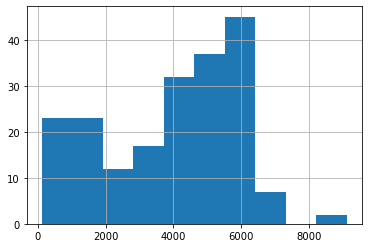

In [237]:
y.hist()

In [238]:
steps = 100
indicators = np.arange(0,10000,steps)

for indicator in indicators:
    df['indi_'+str(indicator)]= y < indicator
    

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, df[['indi_'+str(indicator) for indicator in indicators]], test_size=0.33, random_state=42)


In [240]:
columns = y_train.columns

In [241]:
columns

Index(['indi_0', 'indi_100', 'indi_200', 'indi_300', 'indi_400', 'indi_500',
       'indi_600', 'indi_700', 'indi_800', 'indi_900', 'indi_1000',
       'indi_1100', 'indi_1200', 'indi_1300', 'indi_1400', 'indi_1500',
       'indi_1600', 'indi_1700', 'indi_1800', 'indi_1900', 'indi_2000',
       'indi_2100', 'indi_2200', 'indi_2300', 'indi_2400', 'indi_2500',
       'indi_2600', 'indi_2700', 'indi_2800', 'indi_2900', 'indi_3000',
       'indi_3100', 'indi_3200', 'indi_3300', 'indi_3400', 'indi_3500',
       'indi_3600', 'indi_3700', 'indi_3800', 'indi_3900', 'indi_4000',
       'indi_4100', 'indi_4200', 'indi_4300', 'indi_4400', 'indi_4500',
       'indi_4600', 'indi_4700', 'indi_4800', 'indi_4900', 'indi_5000',
       'indi_5100', 'indi_5200', 'indi_5300', 'indi_5400', 'indi_5500',
       'indi_5600', 'indi_5700', 'indi_5800', 'indi_5900', 'indi_6000',
       'indi_6100', 'indi_6200', 'indi_6300', 'indi_6400', 'indi_6500',
       'indi_6600', 'indi_6700', 'indi_6800', 'indi_6900', 'ind

In [247]:
j = 0
for i,column in enumerate(columns):
    if( y_train[column].nunique()==1):
        j+=1
        y_test["predict_" + column] = 0
        y_test["survival_" + column] = 1
        y_test["survival_log_" + column] = 0
        y_test["hazard_" + column] = 0

        continue
    clf = LogisticRegression(random_state=0,solver='liblinear').fit(X_train, y_train[column])
    
    
    y_test["predict_" + column] = clf.predict_proba(X_test)[:,1]
    if(i>1):
        y_test["predict_" + column] =  np.maximum(y_test["predict_" + columns[i-1]],y_test["predict_" + column])
        y_test["survival_simp" + column] = 1 - y_test["predict_" + column]
        
        y_test["survival_log_" + column] = np.log(y_test["survival_simp" + column])
        y_test["hazard_" + column] =( -  y_test["survival_log_" + column] + y_test["survival_log_" + columns[i-1]])/steps


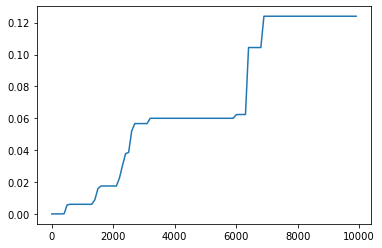

In [248]:
plt.plot(indicators,y_test.iloc[65,:][y_test.columns[y_test.columns.str.startswith("hazard_")]].cumsum())

### Issue: Prediction of probabilities is not turning out to be cummulative